In [1]:
#Import some modules
import numpy as np
import pandas as pd
from scipy import interp
%matplotlib inline
import matplotlib.pyplot as plt
import model_fitting as mfit
import loan_roi as lr

from sklearn.feature_selection import f_regression, SelectKBest, f_classif
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Read in the training, test, and validation data sets
X_train = pd.read_pickle('X_train')
y_train = pd.read_pickle('y_train')
X_test = pd.read_pickle('X_test')
y_test = pd.read_pickle('y_test')
X_val = pd.read_pickle('X_val')
y_val = pd.read_pickle('y_val')
ROI = pd.read_pickle('ROI')

In [3]:
clf = LogisticRegression(penalty='l2', C=1, class_weight = {0: (1.0 - 0.1841), 1: 0.1841})
cv = StratifiedKFold(y_train, n_folds=5, shuffle=True, random_state=42)
df = mfit.add_feature_auc(X_train, y_train, X_val, y_val, clf, cv, 20)

In [4]:
df

,cv_auc,cv_std,train_auc,val_auc
1,0.675513,0.003280,0.675547,0.671889
2,0.682182,0.002367,0.682294,0.678927
3,0.682157,0.002368,0.682224,0.678648
4,0.682911,0.002512,0.683002,0.679916
5,0.682921,0.002515,0.683010,0.679934
6,0.692820,0.002803,0.692901,0.691771
7,0.693241,0.002978,0.693362,0.692659
8,0.693344,0.003033,0.693435,0.692797
9,0.693304,0.002948,0.693433,0.692688
10,0.695123,0.002774,0.695200,0.695473


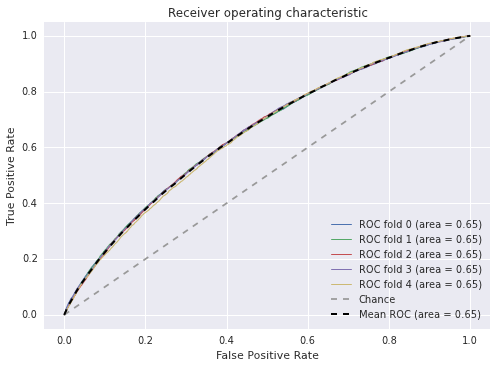

In [3]:
#Set up training and cross-validation for a logistic regression classifier
clf = LogisticRegression(penalty='l2', C=0.4, class_weight = {0: (1.0 - 0.1841), 1: 0.1841})
cv = StratifiedKFold(y_train, n_folds=5, shuffle=True, random_state=42)

mean_auc, clf = mfit.fit_plot_ROC(X_train, y_train, clf, cv)

In [4]:
probas_ = clf.predict_proba(X_val)
prob_default = pd.Series(data = probas_[:,1], index=X_val.index)
pred_ROI = ROI.loc[X_val.index]
pred_ROI['default'] = y_val

In [5]:
b = 10000
p_rej = np.arange(0.05, 0.4, 0.05)

/Users/jared/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


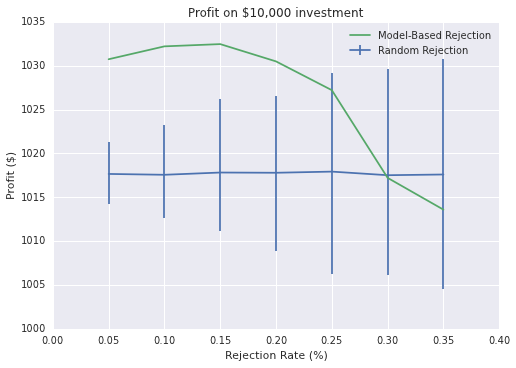

In [6]:
val_frame = lr.model_perf_dollars(pred_ROI, prob_default, p_rej, 'default', 'roi', 0)

In [7]:
val_frame

,reject,random,random_hi_ci,random_lo_ci,perfect
0.05,1030.741109,1017.660720,1021.308627,1014.253102,1245.888302
0.10,1032.211310,1017.565104,1023.297937,1012.600000,1245.888302
0.15,1032.467857,1017.822018,1026.250790,1011.207969,1245.888302
0.20,1030.495626,1017.795080,1026.588323,1008.923835,1245.888302
0.25,1027.214286,1017.926839,1029.187500,1006.212568,1245.888302
0.30,1017.213542,1017.516678,1029.626470,1006.096341,1245.888302
0.35,1013.590404,1017.597401,1030.746258,1004.588220,1245.888302


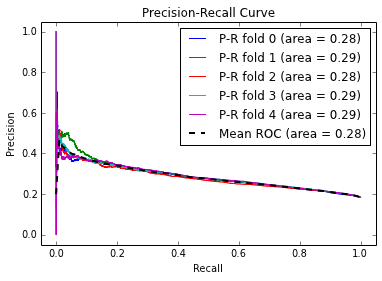

In [4]:
#Precision-Recall Curve
mean_auc, clf = mfit.fit_plot_PR(X_train, y_train, clf, cv)

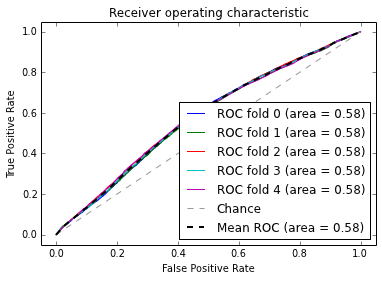

In [5]:
#Set up training and cross-validation for a naive Bayes classifier
clf = GaussianNB()
cv = StratifiedKFold(y_train, n_folds=5, shuffle=True, random_state=42)

mean_auc, clf = mfit.fit_plot_ROC(X_train, y_train, clf, cv)

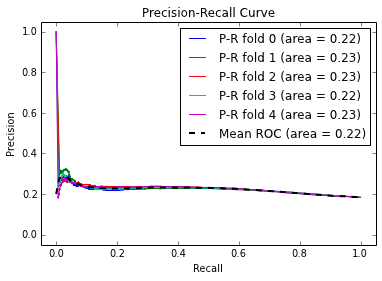

In [6]:
#Precision-Recall Curve
mean_auc, clf = mfit.fit_plot_PR(X_train, y_train, clf, cv)

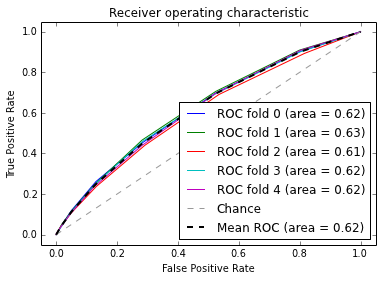

In [7]:
# Set up training and cross-validation for a Random Forest classifier
clf = RandomForestClassifier()
cv = StratifiedKFold(y_train, n_folds=5, shuffle=True, random_state=42)

mean_auc, clf = mfit.fit_plot_ROC(X_train, y_train, clf, cv)

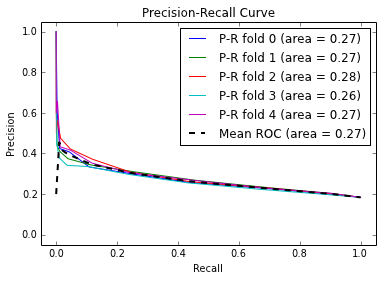

In [8]:
#Precision-Recall Curve
mean_auc, clf = mfit.fit_plot_PR(X_train, y_train, clf, cv)